In [224]:
import psycopg2
import pandas as pd
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

In [225]:
# Load environment variables from the .env file
load_dotenv()

True

In [226]:
# Retrieve database credentials from environment variables
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")
database = os.getenv("DB_NAME")

In [227]:
# Create a connection to the database
connection = psycopg2.connect(
    user=user,
    password=password,
    host=host,
    port=port,
    database=database
)
print('Connected to the database!')

Connected to the database!


In [228]:
# Create a cursor to execute queries on the database
cursor = connection.cursor()

In [229]:
# Define a query to retrieve all table names in the public schema
query = """
        SELECT table_name
        FROM information_schema.tables
        WHERE table_schema = 'public'
        ORDER BY table_name;
        """

# Execute the query
cursor.execute(query)

In [230]:
# Fetch all the tables
tablas = cursor.fetchall()

# Print the list of tables
print('List of tables in the database:')
for tabla in tablas:
    print(f'   {tabla}')

List of tables in the database:
   ('brands',)
   ('categories',)
   ('customers',)
   ('demand_inventory_state',)
   ('order_items',)
   ('orders',)
   ('products',)
   ('staffs',)
   ('stocks',)
   ('stores',)


In [231]:
# Function to retrieve query results as a pandas DataFrame
def sql2pandas(credenciales, query):
    # Connect to the database using the provided credentials
    connection = psycopg2.connect(
        user=credenciales['user'],
        password=credenciales['password'],
        host=credenciales['host'],
        port=credenciales['port'],
        database=credenciales['database']
    )

    # Execute the query and load the results into a DataFrame
    df = pd.read_sql_query(query, connection)

    return df

In [232]:
# Create a dictionary to store database credentials
credenciales = {
    'user': user,
    'password': password,
    'host': host,
    'port': port,
    'database': database
}

In [233]:
# Query the "brands" table and load it into a DataFrame
query = """SELECT * FROM brands;"""
df_brands = sql2pandas(credenciales, query)
df_brands
df_brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brand_id    9 non-null      int64 
 1   brand_name  9 non-null      object
dtypes: int64(1), object(1)
memory usage: 276.0+ bytes


C:\Users\Lucas\AppData\Local\Temp\ipykernel_24548\1946715616.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [234]:
# Query the "categories" table and load it into a DataFrame
query = """SELECT * FROM categories;"""
df_categories = sql2pandas(credenciales, query)
df_categories

C:\Users\Lucas\AppData\Local\Temp\ipykernel_24548\1946715616.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [235]:
# Query the "customers" table and load it into a DataFrame
query = """SELECT * FROM customers;"""
df_customers = sql2pandas(credenciales, query)
df_customers
df_customers.info()
df_customers.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1445 non-null   int64 
 1   first_name   1445 non-null   object
 2   last_name    1445 non-null   object
 3   phone        178 non-null    object
 4   email        1445 non-null   object
 5   street       1445 non-null   object
 6   city         1445 non-null   object
 7   state        1445 non-null   object
 8   zip_code     1445 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 101.7+ KB


C:\Users\Lucas\AppData\Local\Temp\ipykernel_24548\1946715616.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


(1445, 9)

In [236]:
# Retrieve unique values from specific columns in the "customers" table
unique_customer_id = df_customers['customer_id'].unique()
unique_cities = df_customers['city'].unique()
unique_state = df_customers['state'].unique()

# Print unique values
print("Unique customer_id values:", unique_customer_id)
print("Unique city values:", unique_cities)
print("Unique state values:", unique_state)

Unique customer_id values: [   1    2    3 ... 1443 1444 1445]
Unique city values: ['Orchard Park' 'Campbell' 'Redondo Beach' 'Uniondale' 'Sacramento'
 'Fairport' 'Buffalo' 'Jackson Heights' 'Port Washington' 'Monroe'
 'Monsey' 'Hempstead' 'Longview' 'Forney' 'Plattsburgh' 'New York'
 'Scarsdale' 'Canandaigua' 'Sugar Land' 'Victoria' 'East Northport'
 'Hollis' 'Atwater' 'Mahopac' 'Long Beach' 'Sunnyside' 'Ossining'
 'Torrance' 'Oakland' 'Fullerton' 'Palos Verdes Peninsula' 'Baldwinsville'
 'Liverpool' 'Maspeth' 'Astoria' 'Lancaster' 'Encino' 'Queensbury'
 'Richmond Hill' 'Houston' 'Elmont' 'Bethpage' 'San Lorenzo' 'Merrick'
 'East Elmhurst' 'Glendora' 'Utica' 'Bronx' 'Central Islip'
 'Rockville Centre' 'San Carlos' 'San Angelo' 'Amityville' 'Desoto' 'Rome'
 'Garland' 'Rowlett' 'Rocklin' 'South El Monte' 'North Tonawanda'
 'Port Jefferson Station' 'Richardson' 'Baldwin' 'Coachella' 'Lindenhurst'
 'Huntington Station' 'Oswego' 'Duarte' 'Upland' 'Franklin Square'
 'San Diego' 'Farmingdale

In [237]:
# Count the number of customers per state
customers_per_state = df_customers.groupby('state')['customer_id'].count()

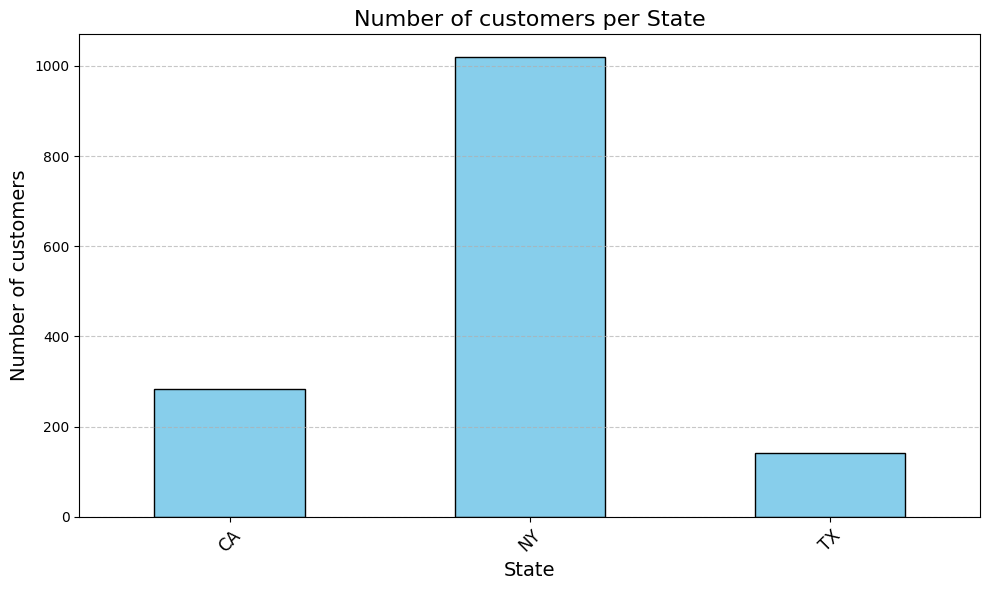

In [238]:
# Create a bar chart for the number of customers per state
plt.figure(figsize=(10, 6))
customers_per_state.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the chart
plt.title('Number of customers per State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()

In [239]:
# Query the "order_items" table and load it into a DataFrame
query = """SELECT * FROM order_items;"""
df_order_items = sql2pandas(credenciales, query)
df_order_items

df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4722 entries, 0 to 4721
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    4722 non-null   int64  
 1   item_id     4722 non-null   int64  
 2   product_id  4722 non-null   int64  
 3   quantity    4722 non-null   int64  
 4   list_price  4722 non-null   float64
 5   discount    4722 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 221.5 KB


C:\Users\Lucas\AppData\Local\Temp\ipykernel_24548\1946715616.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [240]:
# Query the "orders" table and load it into a DataFrame
query = """SELECT * FROM orders;"""
df_orders = sql2pandas(credenciales, query)
df_orders

df_orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1615 non-null   int64 
 1   customer_id    1615 non-null   int64 
 2   order_status   1615 non-null   int64 
 3   order_date     1615 non-null   object
 4   required_date  1615 non-null   object
 5   shipped_date   1445 non-null   object
 6   store_id       1615 non-null   int64 
 7   staff_id       1615 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 101.1+ KB


C:\Users\Lucas\AppData\Local\Temp\ipykernel_24548\1946715616.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [241]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1615 non-null   int64 
 1   customer_id    1615 non-null   int64 
 2   order_status   1615 non-null   int64 
 3   order_date     1615 non-null   object
 4   required_date  1615 non-null   object
 5   shipped_date   1445 non-null   object
 6   store_id       1615 non-null   int64 
 7   staff_id       1615 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 101.1+ KB


In [242]:
# Count the occurrences of each customer_id in the "orders" table
customer_counts = df_orders['customer_id'].value_counts()

# Print the result
print(customer_counts)
df_orders.info()
df_orders.shape

customer_id
1       3
20      3
64      3
116     3
9       3
       ..
982     1
478     1
972     1
1154    1
1212    1
Name: count, Length: 1445, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1615 non-null   int64 
 1   customer_id    1615 non-null   int64 
 2   order_status   1615 non-null   int64 
 3   order_date     1615 non-null   object
 4   required_date  1615 non-null   object
 5   shipped_date   1445 non-null   object
 6   store_id       1615 non-null   int64 
 7   staff_id       1615 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 101.1+ KB


(1615, 8)

In [243]:
# Query the "products" table and load it into a DataFrame
query = """SELECT * FROM products;"""
df_products = sql2pandas(credenciales, query)
df_products
df_products.info()
df_products.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    321 non-null    int64  
 1   product_name  321 non-null    object 
 2   brand_id      321 non-null    int64  
 3   category_id   321 non-null    int64  
 4   model_year    321 non-null    int64  
 5   list_price    321 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 15.2+ KB


C:\Users\Lucas\AppData\Local\Temp\ipykernel_24548\1946715616.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


(321, 6)

In [244]:
# Query the "staffs" table and load it into a DataFrame
query = """SELECT * FROM staffs;"""
df_staffs = sql2pandas(credenciales, query)
df_staffs

C:\Users\Lucas\AppData\Local\Temp\ipykernel_24548\1946715616.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,staff_id,first_name,last_name,email,phone,active,store_id,manager_id
0,1,Fabiola,Jackson,fabiola.jackson@bikes.shop,(831) 555-5554,1,1,NaN
1,2,Mireya,Copeland,mireya.copeland@bikes.shop,(831) 555-5555,1,1,1.0
2,3,Genna,Serrano,genna.serrano@bikes.shop,(831) 555-5556,1,1,2.0
3,4,Virgie,Wiggins,virgie.wiggins@bikes.shop,(831) 555-5557,1,1,2.0
4,5,Jannette,David,jannette.david@bikes.shop,(516) 379-4444,1,2,1.0
5,6,Marcelene,Boyer,marcelene.boyer@bikes.shop,(516) 379-4445,1,2,5.0
6,7,Venita,Daniel,venita.daniel@bikes.shop,(516) 379-4446,1,2,5.0
7,8,Kali,Vargas,kali.vargas@bikes.shop,(972) 530-5555,1,3,1.0
8,9,Layla,Terrell,layla.terrell@bikes.shop,(972) 530-5556,1,3,7.0
9,10,Bernardine,Houston,bernardine.houston@bikes.shop,(972) 530-5557,1,3,7.0


In [245]:
# Query the "stocks" table and load it into a DataFrame
query = """SELECT * FROM stocks;"""
df_stocks = sql2pandas(credenciales, query)
df_stocks

C:\Users\Lucas\AppData\Local\Temp\ipykernel_24548\1946715616.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,store_id,product_id,quantity
0,1,1,27
1,1,2,5
2,1,3,6
3,1,4,23
4,1,5,22
...,...,...,...
934,3,309,30
935,3,310,8
936,3,311,23
937,3,312,18


In [246]:
# Query the "stores" table and load it into a DataFrame
query = """SELECT * FROM stores;"""
df_stores = sql2pandas(credenciales, query)
df_stores

C:\Users\Lucas\AppData\Local\Temp\ipykernel_24548\1946715616.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,store_id,store_name,phone,email,street,city,state,zip_code
0,1,Santa Cruz Bikes,(831) 476-4321,santacruz@bikes.shop,3700 Portola Drive,Santa Cruz,CA,95060
1,2,Baldwin Bikes,(516) 379-8888,baldwin@bikes.shop,4200 Chestnut Lane,Baldwin,NY,11432
2,3,Rowlett Bikes,(972) 530-5555,rowlett@bikes.shop,8000 Fairway Avenue,Rowlett,TX,75088


Preparación de datos
Consolidaremos las tablas necesarias y generaremos un conjunto de datos limpio y estructurado.

Datos necesarios:
stocks: Información de inventario disponible por tienda y producto.
Columnas útiles: store_id, product_id, quantity.
orders: Historial de pedidos.
Columnas útiles: order_id, store_id, product_id, quantity, order_date.
stores: Ubicación de cada tienda.
Columnas útiles: store_id, state.
Unión de tablas:
Relacionar orders con stores usando store_id para asignar el estado (state) de cada pedido.
Usar stocks para agregar información del inventario disponible.
Agrupar la cantidad de productos vendidos (quantity) por estado y calcular la demanda histórica.

In [247]:
# Query: Cargar datos de order_items
query_order_items = """
SELECT order_id, product_id, quantity
FROM order_items;
"""
df_order_items = sql2pandas(credenciales, query_order_items)
df_order_items.head()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_24548\1946715616.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,order_id,product_id,quantity
0,1,20,1
1,1,8,2
2,1,10,2
3,1,16,2
4,1,4,1


In [248]:
# Query: Cargar datos de orders
query_orders = """
SELECT order_id, store_id, order_date
FROM orders;
"""
df_orders = sql2pandas(credenciales, query_orders)
df_orders.head()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_24548\1946715616.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,order_id,store_id,order_date
0,1,1,2016-01-01
1,2,2,2016-01-01
2,3,2,2016-01-02
3,4,1,2016-01-03
4,5,2,2016-01-03


In [249]:
# Query: Cargar datos de stores
query_stores = """SELECT store_id, state FROM stores;"""
df_stores = sql2pandas(credenciales, query_stores)
df_stores.head()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_24548\1946715616.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,store_id,state
0,1,CA
1,2,NY
2,3,TX


In [250]:
# Query: Cargar datos de stocks
query_stocks = """SELECT store_id, product_id, quantity FROM stocks;"""
df_stocks = sql2pandas(credenciales, query_stocks)
df_stocks.head()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_24548\1946715616.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,store_id,product_id,quantity
0,1,1,27
1,1,2,5
2,1,3,6
3,1,4,23
4,1,5,22


In [251]:
connection.rollback()

In [252]:
# Consulta SQL consolidada
query = """
WITH orders_with_states AS (
    SELECT 
        orders.order_id,
        orders.store_id,
        stores.state
    FROM orders
    LEFT JOIN stores ON orders.store_id = stores.store_id
),
order_details AS (
    SELECT 
        orders_with_states.state,
        order_items.product_id,
        SUM(order_items.quantity) AS total_demand
    FROM order_items
    LEFT JOIN orders_with_states ON order_items.order_id = orders_with_states.order_id
    GROUP BY orders_with_states.state, order_items.product_id
),
inventory_by_state AS (
    SELECT 
        stores.state,
        stocks.product_id,
        SUM(stocks.quantity) AS initial_stock
    FROM stocks
    LEFT JOIN stores ON stocks.store_id = stores.store_id
    GROUP BY stores.state, stocks.product_id
)
SELECT 
    order_details.state,
    order_details.product_id,
    order_details.total_demand,
    COALESCE(inventory_by_state.initial_stock, 0) AS initial_stock
FROM order_details
LEFT JOIN inventory_by_state 
ON order_details.state = inventory_by_state.state 
   AND order_details.product_id = inventory_by_state.product_id;
"""

# Ejecutar la consulta
cursor.execute(query)

In [253]:
# Recuperar los resultados en un DataFrame de pandas
columns = ['state', 'product_id', 'total_demand', 'initial_stock']
df_final = pd.DataFrame(cursor.fetchall(), columns=columns)

# Mostrar el DataFrame final
print(df_final)

    state  product_id total_demand initial_stock
0      NY         124            7             4
1      NY         206            2             9
2      TX          25           11            15
3      NY          74           13            23
4      CA         175            3             2
..    ...         ...          ...           ...
663    NY         221            2            12
664    NY         252            9            20
665    TX         100            5            28
666    TX           5           14             3
667    TX          37            2            30

[668 rows x 4 columns]


In [254]:
df_final.head(30)

,state,product_id,total_demand,initial_stock
0,NY,124,7,4
1,NY,206,2,9
2,TX,25,11,15
3,NY,74,13,23
4,CA,175,3,2
5,TX,171,2,11
6,TX,85,4,15
7,CA,45,13,15
8,CA,19,13,4
9,CA,252,2,28


In [255]:
# Crear una tabla en la base de datos para guardar el resultado
create_table_query = """
CREATE TABLE IF NOT EXISTS demand_inventory_state (
    state VARCHAR(255),
    product_id INT,
    total_demand BIGINT,
    initial_stock BIGINT
);
"""
cursor.execute(create_table_query)
connection.commit()

In [256]:
# Insertar los datos del DataFrame en la nueva tabla
for _, row in df_final.iterrows():
    insert_query = """
    INSERT INTO demand_inventory_state (state, product_id, total_demand, initial_stock)
    VALUES (%s, %s, %s, %s);
    """
    cursor.execute(insert_query, tuple(row))
connection.commit()

print("Datos guardados en la tabla demand_inventory_state exitosamente!")

# Cerrar la conexión
cursor.close()
connection.close()

Datos guardados en la tabla demand_inventory_state exitosamente!
